In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from typing import List, Tuple

%matplotlib inline

In [2]:
! conda list | grep -E "matplotlib|seaborn|pandas|numpy"

matplotlib                3.1.0            py36h54f8f79_0  
numpy                     1.16.4           py36hacdab7b_0  
numpy-base                1.16.4           py36h6575580_0  
pandas                    0.24.2           py36h0a44026_0  
seaborn                   0.9.0                    py36_0  


In [3]:
# Set data
df = pd.DataFrame(
    data = {
        'Student': ['A', 'B', 'C', 'D'],
        'Math': np.random.randint(60, 100, 4),
        'Physics': np.random.randint(60, 100, 4),
        'Chemistry': np.random.randint(60, 100, 4),
        'History': np.random.randint(60, 100, 4),
        'Geography': np.random.randint(60, 100, 4)
    }
)
df

,Student,Math,Physics,Chemistry,History,Geography
0,A,70,85,77,85,88
1,B,93,96,66,88,89
2,C,85,82,68,85,90
3,D,67,62,87,88,94


## Plot one variable on a radar chart

Text(0.5, 1.05, 'A')

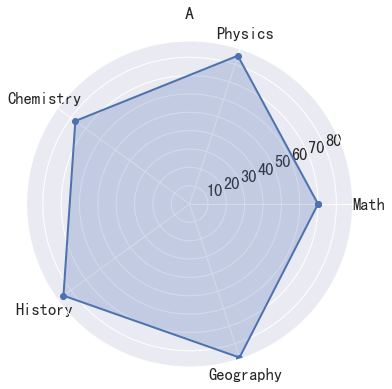

In [4]:
sns.set(style='darkgrid', font='SimHei', rc={'figure.figsize':(8, 6)}, font_scale=1.5)

labels = df.columns.to_numpy()[1:]  # get the labels for radar
stats = df.loc[df.Student == 'A', labels].values[0]  # get the values for radar
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)  # get the angles for each group
# close the plot
stats = np.concatenate((stats, [stats[0]]))
angles = np.concatenate((angles, [angles[0]]))

# method1: Figure
# fig = plt.figure()
# ax = fig.add_subplot(111, polar=True)

# method2: plt.subplot
# method2 is convenient for subplots
# ax = plt.subplot(111, polar=True)
ax = plt.subplot(1, 1, 1, polar=True)  # subplot the polar plot
ax.plot(angles, stats, 'o-', linewidth=2)  # plot: x=angles, y=stats
ax.fill(angles, stats, alpha=0.25)  # fill the polygon
ax.set_thetagrids(angles * 180 / np.pi, labels)  # set the labels by the angles
ax.set_title('A')

## Plot two variables on a radar chart

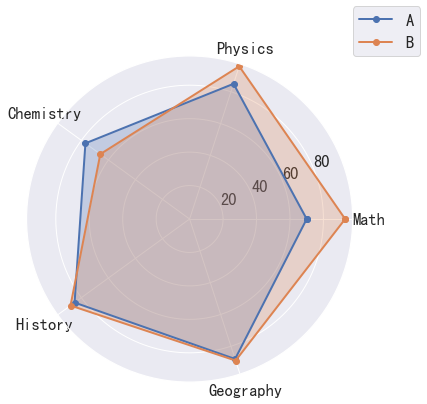

In [5]:
sns.set(style='darkgrid', font='SimHei', rc={'figure.figsize':(8, 6)}, font_scale=1.5)
# A
labels = df.columns.to_numpy()[1:]  # get the labels for radar
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)  # get the angles for each group

stats_A = df.loc[df.Student == 'A', labels].values[0]  # get the values for radar
stats_B = df.loc[df.Student == 'B', labels].values[0]  # get the values for radar
# close the plot
stats_A = np.concatenate((stats_A, [stats_A[0]]))
stats_B = np.concatenate((stats_B, [stats_B[0]]))
angles = np.concatenate((angles, [angles[0]]))
# plot for A
ax = plt.subplot(1, 1, 1, polar=True)  # subplot the polar plot
ax.plot(angles, stats_A, 'o-', linewidth=2)  # plot: x=angles, y=stats
ax.fill(angles, stats_A, alpha=0.25)  # fill the polygon
# plot for B
ax.plot(angles, stats_B, 'o-', linewidth=2)  # plot: x=angles, y=stats
ax.fill(angles, stats_B, alpha=0.25)  # fill the polygon
ax.set_thetagrids(angles * 180 / np.pi, labels)  # set the labels by the angles
# set the legend
ax.legend(['A', 'B'], loc=(1, 1))

## Encapsulate to a function

In [6]:
def get_one_radar(df: pd.DataFrame, names: List):
    labels = df.columns.to_numpy()[1:]  # get the labels for radar
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)  # get the angles for each group    
    angles = np.concatenate((angles, [angles[0]]))  # close the plot
    ax = plt.subplot(111, polar=True)  # subplot the polar plot
    ax.set_thetagrids(angles * 180 / np.pi, labels)  # set the labels by the angles
    
    for name in names:
        stats = df.loc[df.Student == name, labels].values[0]  # get the values for radar        
        stats = np.concatenate((stats, [stats[0]]))  # close the plot
        ax.plot(angles, stats, 'o-', linewidth=2)  # plot: x=angles, y=stats
        ax.fill(angles, stats, alpha=0.25)  # fill the polygon
        
    ax.legend(names, loc=(1, 1))
    return ax

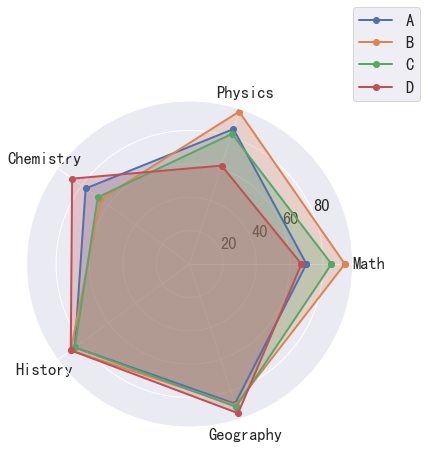

In [7]:
sns.set(style='darkgrid', font='SimHei', rc={'figure.figsize':(8, 6)}, font_scale=1.5)
ax = get_one_radar(df, list('ABCD'))
ax.figure.savefig('./tmp.png', bbox_inches='tight')

## Plot two radar charts on a figure

Text(0.5, 1.05, 'B')

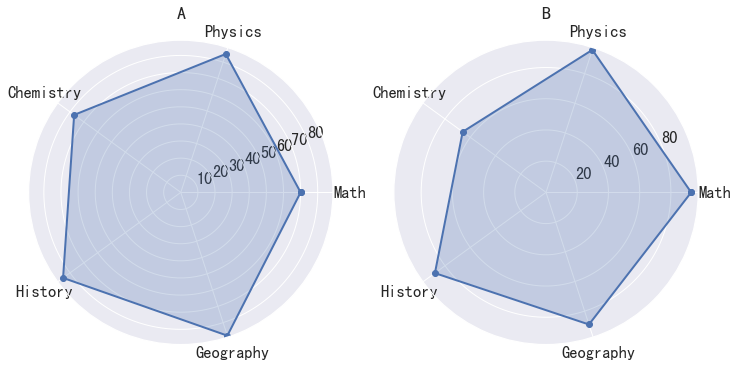

In [8]:
sns.set(style='darkgrid', font='SimHei', rc={'figure.figsize':(12, 9)}, font_scale=1.5)

# A
labels = df.columns.to_numpy()[1:]
stats = df.loc[df.Student == 'A', labels].values[0]
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
stats = np.concatenate((stats, [stats[0]]))
angles = np.concatenate((angles, [angles[0]]))

ax = plt.subplot(121, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180 / np.pi, labels)
ax.set_title('A')

# B
labels = df.columns.to_numpy()[1:]
stats = df.loc[1, labels].values
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
stats = np.concatenate((stats, [stats[0]]))
angles = np.concatenate((angles, [angles[0]]))
ax = plt.subplot(122, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180 / np.pi, labels)
ax.set_title('B')

## Encapsulate to a function

In [9]:
def get_multiple_radar(df: pd.DataFrame, names: List, nrows: int, ncols: int):
    labels = df.columns.to_numpy()[1:]  # get the labels for radar
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)  # get the angles for each group    
    angles = np.concatenate((angles, [angles[0]]))  # close the plot

    for row in range(nrows, nrows + 1):
        for col in range(ncols, ncols + 1):
            for idx in range(1, len(names) + 1):                
                ax = plt.subplot(row, col, idx, polar=True)  # subplot the polar plot
                ax.set_thetagrids(angles * 180 / np.pi, labels)  # set the labels by the angles
    
                stats = df.loc[df.Student == names[idx - 1], labels].values[0]  # get the values for radar        
                stats = np.concatenate((stats, [stats[0]]))  # close the plot
                ax.plot(angles, stats, 'o-', linewidth=2)  # plot: x=angles, y=stats
                ax.fill(angles, stats, alpha=0.25)  # fill the polygon
                ax.set_title(names[idx - 1])
    return ax

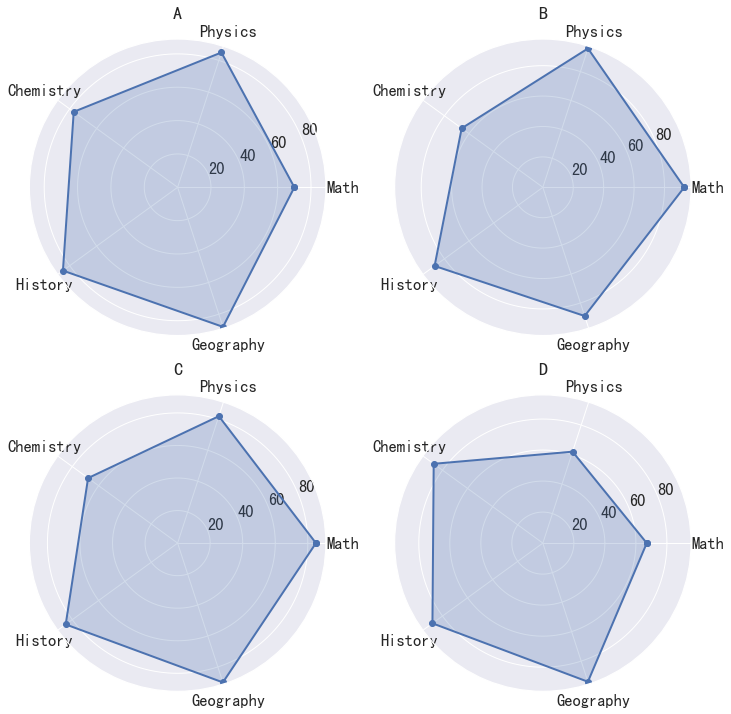

In [10]:
sns.set(style='darkgrid', font='SimHei', rc={'figure.figsize':(12, 12)}, font_scale=1.5)    
ax = get_multiple_radar(df, list('ABCD'), 2, 2)
ax.figure.savefig('./tmp.png', bbox_inches='tight')